# TA Class II

## Quick pandas walkthrough

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Bad key savefig.frameon in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file f

In [2]:
df = pd.read_excel('titanic3.xls', index_col=None)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
df.select_dtypes(include=['int64', 'float64']).head()    #.columns

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


In [5]:
print(df.shape)
df.describe()

(1309, 14)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# drop the irrelevant features
df_reduced = df.drop(['name', 'ticket', 'cabin', 'boat', 'body'], axis=1).head()
df_reduced

,pclass,survived,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [7]:
df.isnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [8]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

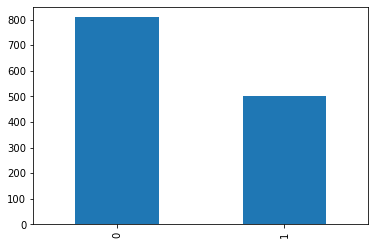

In [9]:
pd.value_counts(df['survived']).plot.bar()

In [10]:
df['survived'].mean()

0.3819709702062643

In [11]:
df.groupby(['sex']).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [12]:
df.groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [13]:
df_under18 = df[df['age']<18].groupby(['sex','pclass']).mean()
df_under18

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

([<matplotlib.axis.XTick at 0x19ed30f0>,
 [Text(0, 0, 'f1'),
  Text(1, 0, 'f2'),
  Text(2, 0, 'f3'),
  Text(3, 0, 'm1'),
  Text(4, 0, 'm2'),
  Text(5, 0, 'm3')])

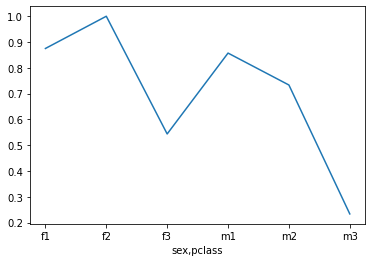

In [14]:
ax = df_under18['survived'].plot()
plt.xticks(range(6), ('f1', 'f2', 'f3', 'm1', 'm2', 'm3'))

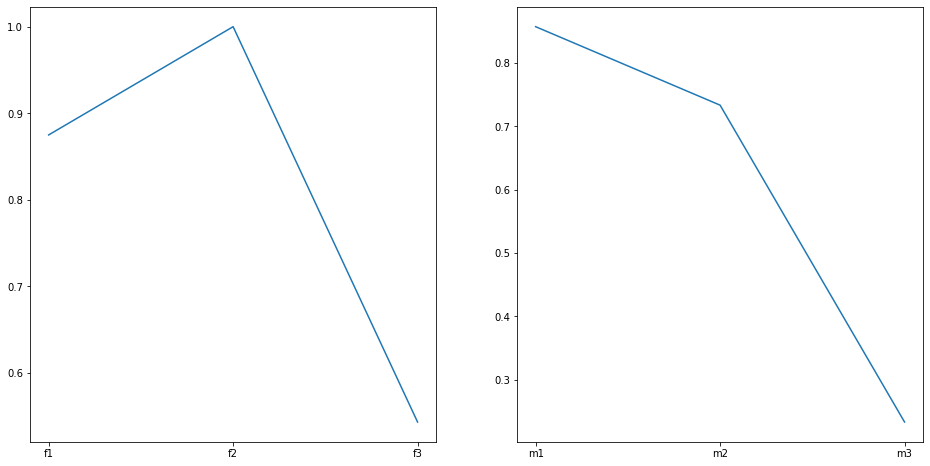

In [15]:
dum = np.zeros(6)
df_under18_survived = pd.DataFrame(dum)
for i in range(6):
    df_under18_survived.iloc[i] = df_under18['survived'][i]    # just some quick and dirty tricks...

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
plt.xticks(range(3), ('f1', 'f2', 'f3'))
ax2 = fig.add_subplot(1, 2, 2)
plt.xticks(range(3,6), ('m1', 'm2', 'm3'))    # the constructions of subplots might not be the same way as you think...

ax1.plot(df_under18_survived.iloc[0:3])
ax2.plot(df_under18_survived.iloc[3:6])

In [16]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [17]:
@interact_manual  # or @interact_manual
def show_age_more_than(column=['age'], x=widgets.IntSlider(min=0, max=100, step=1, value=30), y=widgets.IntSlider(min=0, max=100, step=1, value=40)):
    high = max(x,y)
    low  = min(x,y)    
    df_cut = df.loc[df[column] > low]
    df_new = df_cut.loc[high > df_cut[column]]
    print('There are ' + str(df_new.shape[0]) + 'people aged between ' + str(low) + ' to ' + str(high) + ' years old.')
    return df_new

interactive(children=(Dropdown(description='column', options=('age',), value='age'), IntSlider(value=30, descr…

# 　